<a href="https://colab.research.google.com/github/ShounakD1991/THE_SPARKS_FOUNDATION_GRIP/blob/main/The_Sparks_Foundation_GRIP_TASK_2_03_04_2021_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# **The Sparks Foundation**
---



## ***Data Science and Business Analytics Internship***
### ***Notebook by- Shounak Sushanta Dasgupta***
### **Task No. : 2**

#### **Problem Statement:** From the given 'Iris' Dataset, Predict the optimum number of clusters and represent it visually
#### **KMeans Clustering:** In the following Unsupervised learning K Means clustering will be used to form the cluster, it is a non-hierarchical method to find the cluster for different datapoint. 
#### **Hierarchical Clustering:** In the following Unsupervised learning Agglomerative clustering (Bottom to top approach) will be used to form the cluster, it is a hierarchical method to find the cluster for different datapoint. 

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import  warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

### **Reading Dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/The Sparks Foundation/The_Sparks_Foundation_GRIP_TASK_2_03.04.2021_Prediction_Using_Unsupervised_ML.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Making a copy of Dataset**

In [3]:
df1=df.copy()

### **Description of Dataset**

#### Shape of the Dataset

In [4]:
df1.iloc[:,1:].shape

(150, 5)

#### Information about Dataset

In [5]:
df1.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 5 Point Statistical Summary of Dataset

In [6]:
df1.iloc[:,1:-1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


#### Correlation between different numerical variable

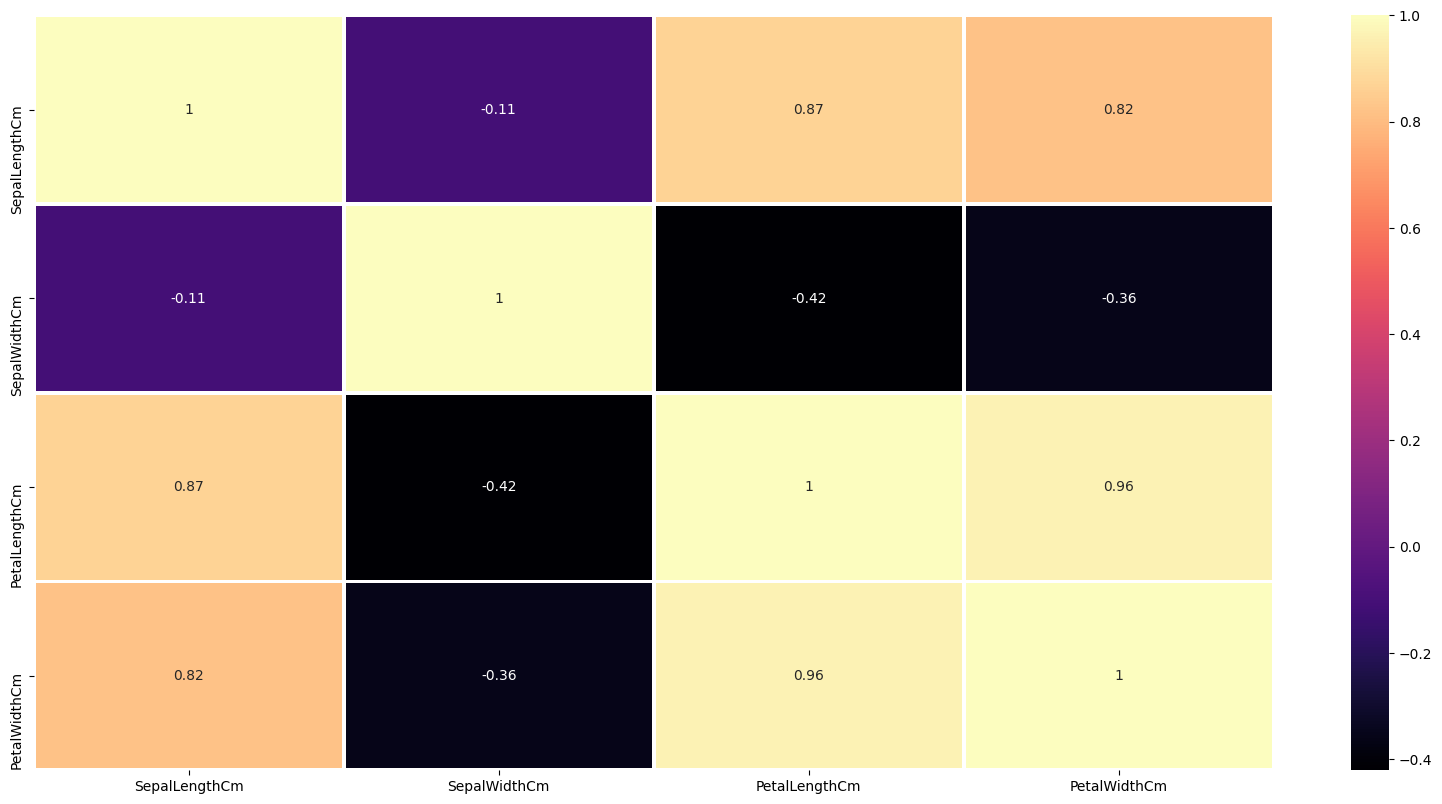

In [7]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df1.iloc[:,1:].corr(),annot=True,cmap='magma',linewidths=2)
plt.show()

### **Encoding the Species**

In [8]:
LE=LabelEncoder()
df1['Species_Encoded']=LE.fit_transform(df1['Species'])
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### **Pairplot between the Independent Variable keeping the target variable as hue**

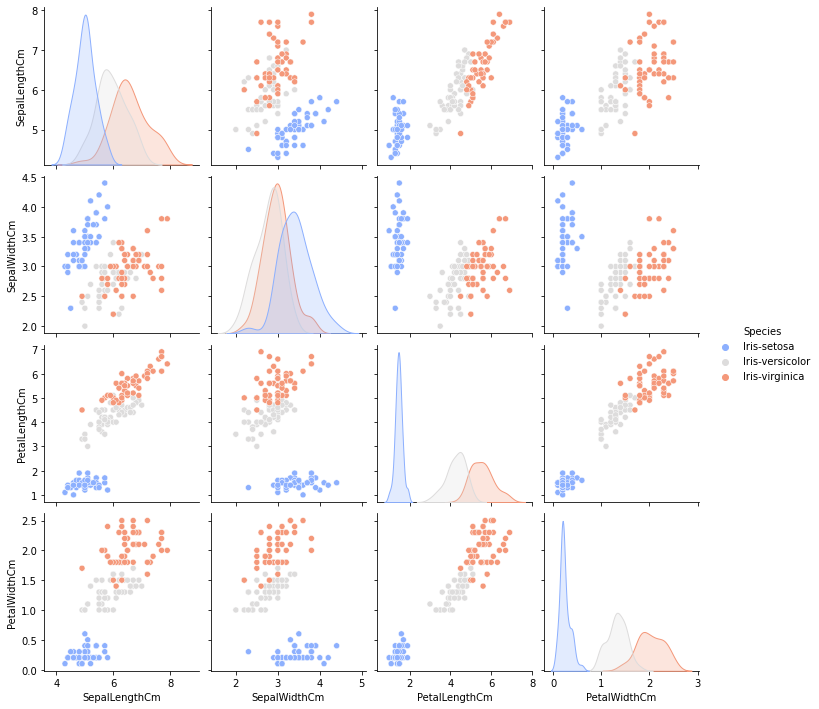

In [9]:
sns.pairplot(data=df1,hue='Species',vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],diag_kind='kde',palette='coolwarm')
plt.show()

### **Box Plot of different independent variable to know the spread**

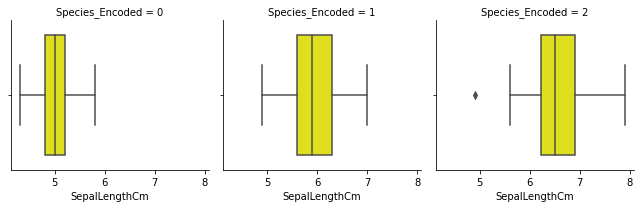

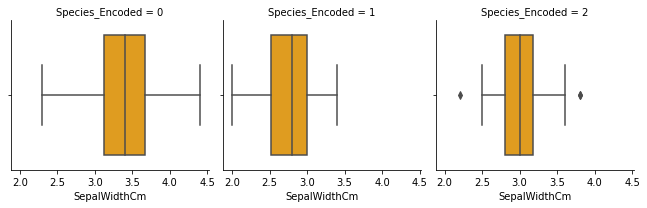

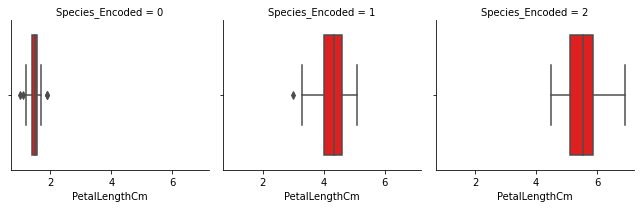

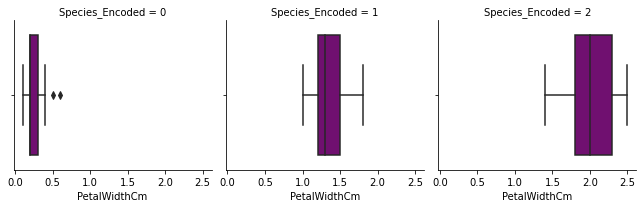

In [10]:
SepalLengthCm = sns.FacetGrid(df1, col='Species_Encoded')
SepalLengthCm.map(sns.boxplot, 'SepalLengthCm', color='yellow', order=['0', '1', '2'])

SepalWidthCm = sns.FacetGrid(df1, col='Species_Encoded')
SepalWidthCm.map(sns.boxplot, 'SepalWidthCm', color='orange', order=['0', '1', '2'])

PetalLengthCm = sns.FacetGrid(df1, col='Species_Encoded')
PetalLengthCm.map(sns.boxplot, 'PetalLengthCm', color='red', order=['0', '1', '2'])

PetalWidthCm = sns.FacetGrid(df1, col='Species_Encoded')
PetalWidthCm.map(sns.boxplot, 'PetalWidthCm', color='purple', order=['0', '1', '2'])
plt.show()

### **Removal of non Dependent column and Column ID**

In [11]:
df2=df1.iloc[:,1:5]
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Calculation of Cluster Errors using WCSS and Plotting Elbow Curve**

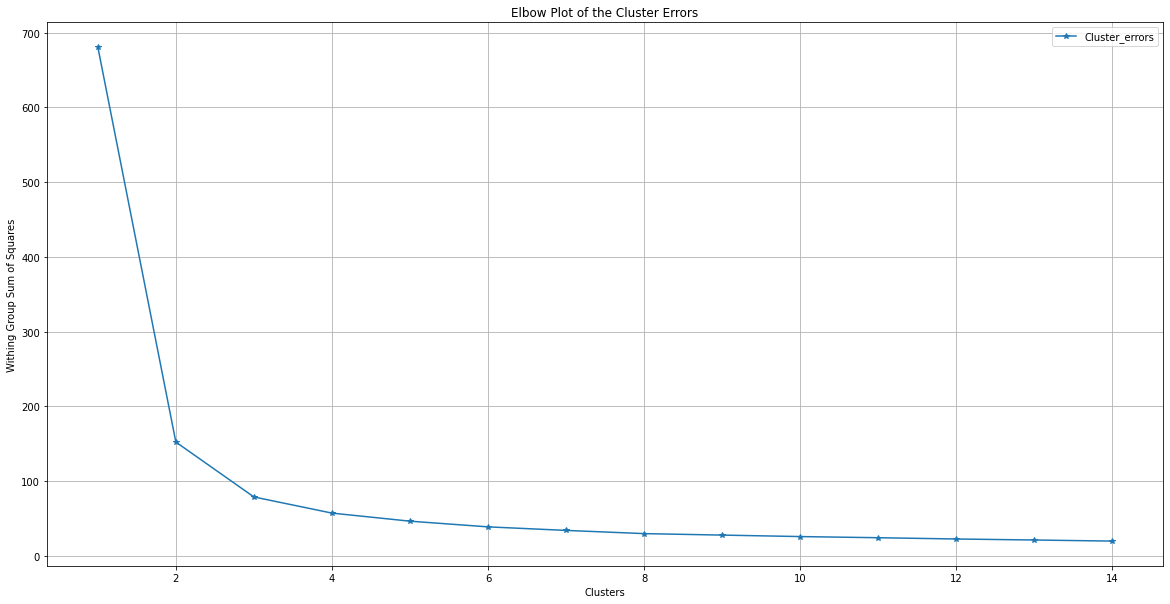

,Num_cluster,Cluster_errors
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.345409
4,5,46.535582
5,6,38.938740
6,7,34.190688
7,8,29.905374
8,9,27.927882
9,10,25.955497


In [12]:
wcss=[]
for n in range (1,15):
    kmeans=KMeans(n_clusters = n, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
df3=pd.DataFrame({"Num_cluster":range(1,15),"Cluster_errors":wcss})
df3.plot(kind="line",x='Num_cluster',y='Cluster_errors',figsize=(20,10),title="Elbow Plot of the Cluster Errors",grid=True,xlabel="Clusters",ylabel="Withing Group Sum of Squares",marker="*")
plt.show()
df3

### **Clustering the data using best value of number of clusters found out by elbow curve**

In [13]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(df2)
df_labels=pd.DataFrame({"Kmeans_labels":kmeans.labels_})
df_labels['Kmeans_labels'] = df_labels['Kmeans_labels'].astype('category')
df_labels.head()

,Kmeans_labels
0,1
1,1
2,1
3,1
4,1


### **Plotting the Data and Respective Centroids**

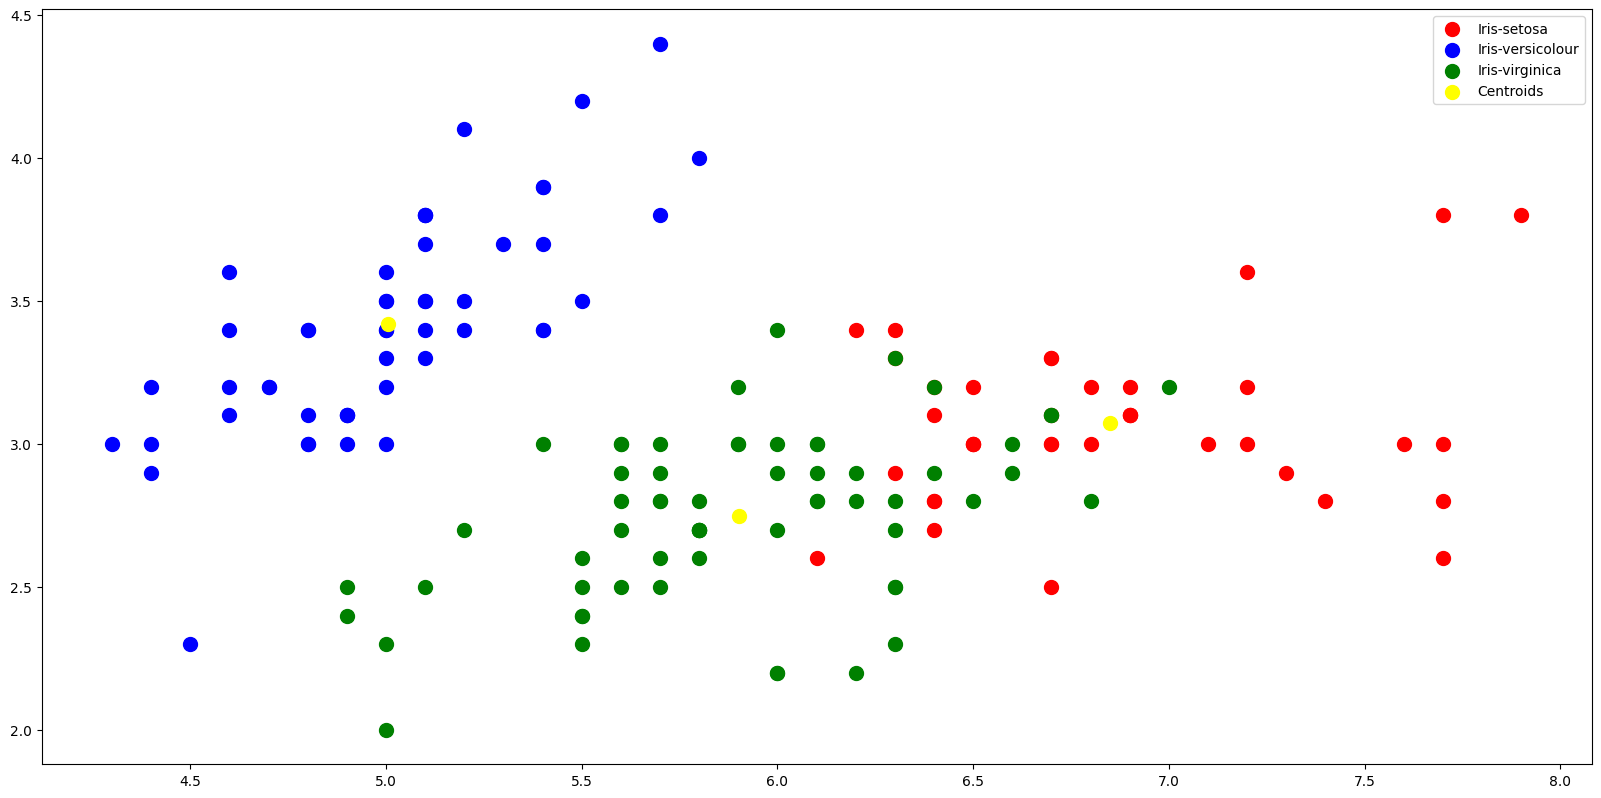

In [14]:
x=df.iloc[:, [ 1, 2, 3,4]].values
plt.figure(figsize=(20,10),dpi=100)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')


plt.legend()
plt.show()

### **Creating a Dataframe having the original classification and classification using K-Means**

In [15]:
df4=pd.concat([df1,df_labels],axis=1)
df4.set_index(keys="Id",inplace=True)
df4.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded,Kmeans_labels
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
5,5.0,3.6,1.4,0.2,Iris-setosa,0,1


### **Clustering using Hierarchical Agglomerative Clustering**

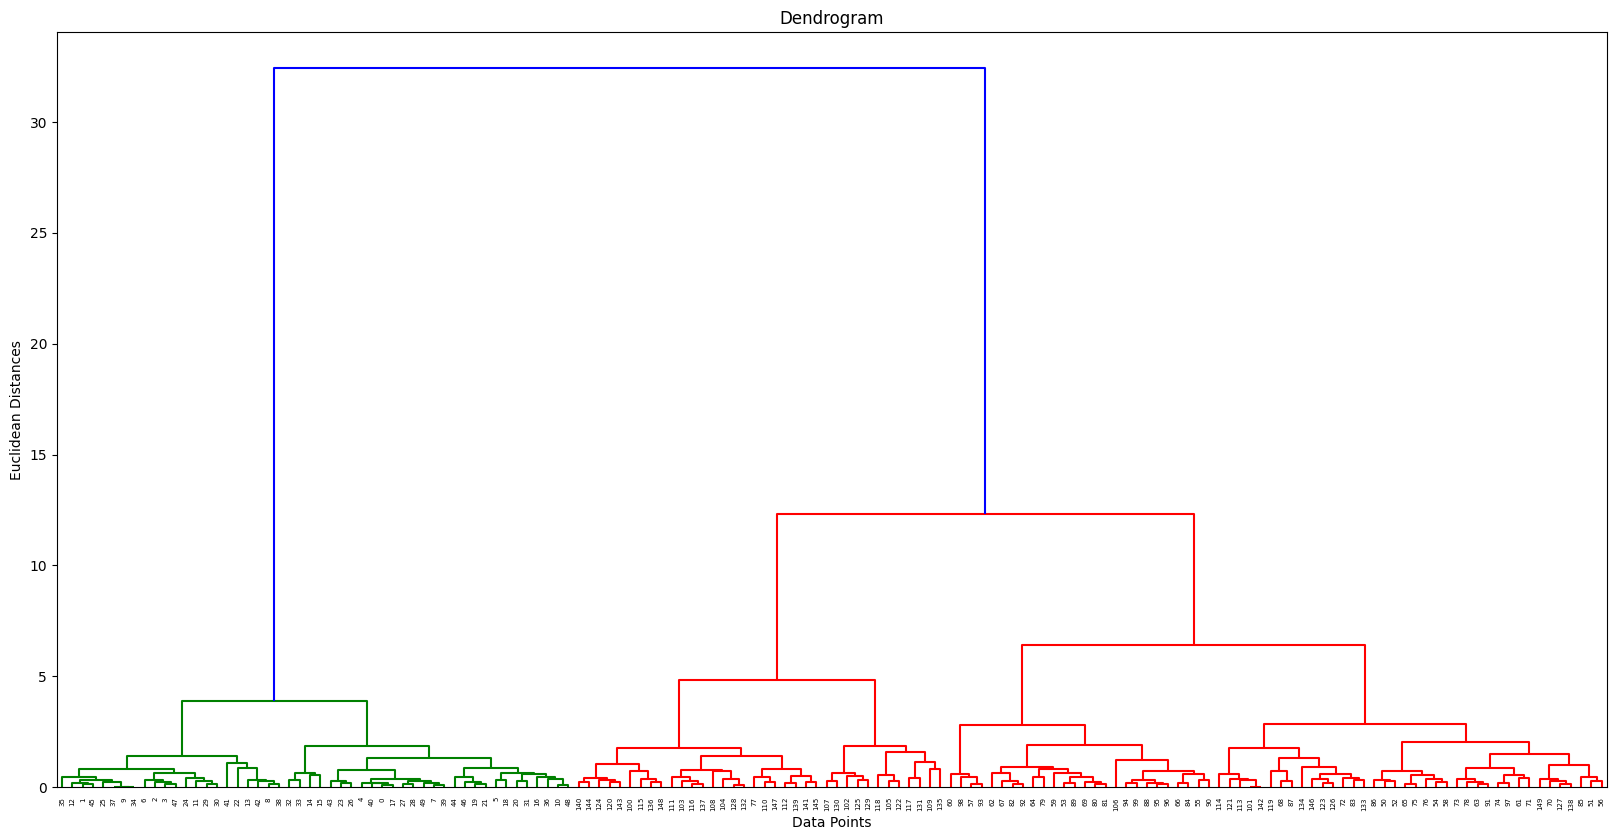

In [16]:
plt.figure(figsize=(20,10),dpi=100)
merge=linkage(y=df2,method='ward')
dendrogram(merge,leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.xticks(rotation=90)
plt.show()

### **Creating a Dataframe having the original classification, classification using K-Means and classification using Agglomerative clustering**

In [17]:
hie_cluster=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
df4['Labels_Hie']=hie_cluster.fit_predict(df2)
df4

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded,Kmeans_labels,Labels_Hie
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,0,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,0,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,0,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,0,1,1
6,5.4,3.9,1.7,0.4,Iris-setosa,0,1,1
7,4.6,3.4,1.4,0.3,Iris-setosa,0,1,1
8,5.0,3.4,1.5,0.2,Iris-setosa,0,1,1
9,4.4,2.9,1.4,0.2,Iris-setosa,0,1,1


### **Change in number of classes using different clustering methods**

In [18]:
print('Original Data Classes:')
print(df4.Species_Encoded.value_counts())
print('-' * 30)
print('K Means Predicted Data Classes:')
print(df4.Kmeans_labels.value_counts())
print('Agglomerative Clustering Predicted Data Classes:')
print(df4.Labels_Hie.value_counts())

Original Data Classes:
2    50
1    50
0    50
Name: Species_Encoded, dtype: int64
------------------------------
K Means Predicted Data Classes:
2    62
1    50
0    38
Name: Kmeans_labels, dtype: int64
Agglomerative Clustering Predicted Data Classes:
0    64
1    50
2    36
Name: Labels_Hie, dtype: int64


### **Plotting the Data to understand the clustering done by different clustering methods**

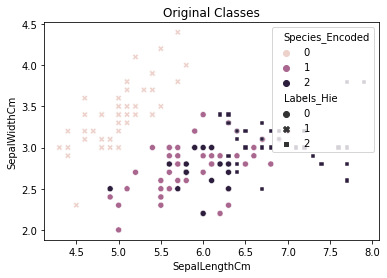

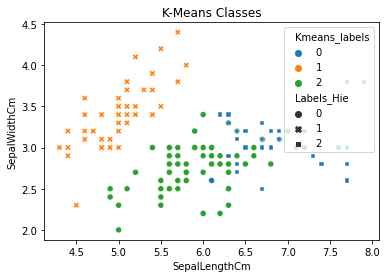

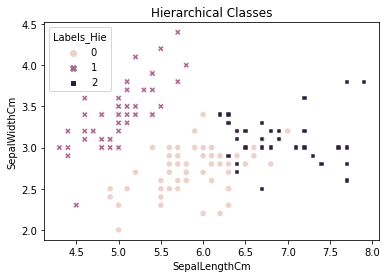

In [19]:
plt.title('Original Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species_Encoded', style='Labels_Hie', data=df4)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Kmeans_labels', style='Labels_Hie', data=df4)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Labels_Hie', style='Labels_Hie', data=df4)
plt.show()

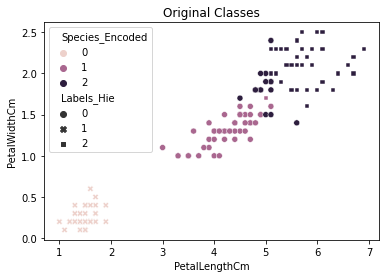

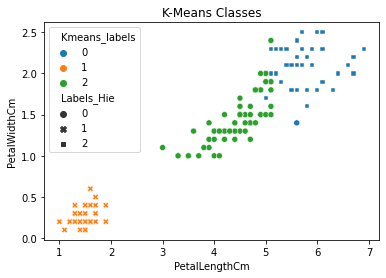

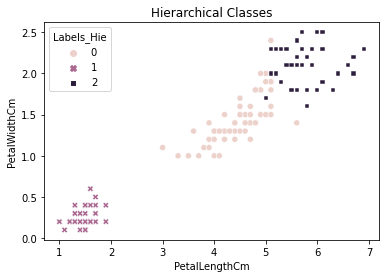

In [20]:
plt.title('Original Classes')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species_Encoded', style='Labels_Hie', data=df4)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Kmeans_labels', style='Labels_Hie', data=df4)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Labels_Hie', style='Labels_Hie', data=df4)
plt.show()

### Calculation of Accuracy Metrics for clustering done by different methods

#### K-Means

In [21]:
x= df4.iloc[:,0:4]
y= df4.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
Dtree=DecisionTreeClassifier(max_depth=3)
Dtree.fit(X_train,y_train)
y_hat_train=Dtree.predict(X_train)
accuracy_train=accuracy_score(y_train,y_hat_train)
y_hat_test=Dtree.predict(X_test)
accuracy_test=accuracy_score(y_test,y_hat_test)
print("-"*30)
print("Train Accuracy  :: ",accuracy_train)
print("-"*30)
print("Test Accuracy  :: ",accuracy_test)
print("-"*30)
print(f"Classification Report\n\n{classification_report(y_train,y_hat_train)}")
print("-"*30)
print(f"Classification Report\n\n{classification_report(y_test,y_hat_test)}")

------------------------------
Train Accuracy  ::  0.9809523809523809
------------------------------
Test Accuracy  ::  0.9555555555555556
------------------------------
Classification Report

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       1.00      1.00      1.00        38
           2       0.95      1.00      0.98        42

    accuracy                           0.98       105
   macro avg       0.98      0.97      0.98       105
weighted avg       0.98      0.98      0.98       105

------------------------------
Classification Report

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       1.00      1.00      1.00        12
           2       0.91      1.00      0.95        20

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.95   

#### Hierarchical-Agglomaritive

In [22]:
x= df4.iloc[:,0:4]
y= df4.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
Dtree=DecisionTreeClassifier(max_depth=3)
Dtree.fit(X_train,y_train)
y_hat_train=Dtree.predict(X_train)
accuracy_train=accuracy_score(y_train,y_hat_train)
y_hat_test=Dtree.predict(X_test)
accuracy_test=accuracy_score(y_test,y_hat_test)
print("-"*30)
print("Train Accuracy  :: ",accuracy_train)
print("-"*30)
print("Test Accuracy  :: ",accuracy_test)
print("-"*30)
print(f"Classification Report\n\n{classification_report(y_train,y_hat_train)}")
print("-"*30)
print(f"Classification Report\n\n{classification_report(y_test,y_hat_test)}")

------------------------------
Train Accuracy  ::  0.9809523809523809
------------------------------
Test Accuracy  ::  0.9777777777777777
------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      1.00      1.00        38
           2       1.00      0.92      0.96        24

    accuracy                           0.98       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.98      0.98      0.98       105

------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00        12
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98   